# Property Valuation EDA


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries loaded!")

Libraries loaded!


In [7]:
df = pd.read_csv('../data/train(1).csv')

print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Shape: (16209, 21)
Columns: ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [8]:

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


---
## Data Overview

In [9]:

print("Data Types:")
print(df.dtypes)

Data Types:
id                 int64
date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [10]:
# Missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [11]:
# Basic statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


---
## Target Variable (Price) Analysis

In [12]:
# Price statistics
print("PRICE STATISTICS")
print(f"Min:    ${df['price'].min():>12,.0f}")
print(f"Max:    ${df['price'].max():>12,.0f}")
print(f"Mean:   ${df['price'].mean():>12,.0f}")
print(f"Median: ${df['price'].median():>12,.0f}")
print(f"Std:    ${df['price'].std():>12,.0f}")

PRICE STATISTICS
Min:    $      75,000
Max:    $   7,700,000
Mean:   $     537,470
Median: $     450,000
Std:    $     360,304


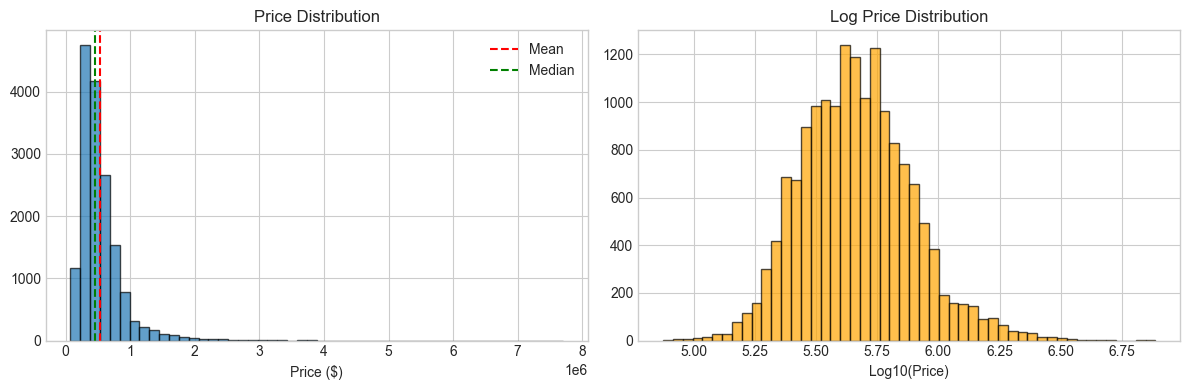


Skewness: 4.03 (>1 means right-skewed, consider log transform)


In [13]:
# Price distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Original
axes[0].hist(df['price'], bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(df['price'].median(), color='green', linestyle='--', label='Median')
axes[0].set_xlabel('Price ($)')
axes[0].set_title('Price Distribution')
axes[0].legend()

# Log-transformed
axes[1].hist(np.log10(df['price']), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Log10(Price)')
axes[1].set_title('Log Price Distribution')

plt.tight_layout()
plt.show()

print(f"\nSkewness: {df['price'].skew():.2f} (>1 means right-skewed, consider log transform)")

---
## Feature Correlations with Price

In [14]:
# Correlation with price
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('id') if 'id' in numeric_cols else None

correlations = df[numeric_cols].corr()['price'].drop('price').sort_values(ascending=False)

print("Correlation with Price:")
print(correlations.round(3))

Correlation with Price:
sqft_living      0.701
grade            0.664
sqft_above       0.603
sqft_living15    0.582
bathrooms        0.525
view             0.391
sqft_basement    0.320
lat              0.310
bedrooms         0.304
floors           0.251
waterfront       0.245
yr_renovated     0.133
sqft_lot         0.089
sqft_lot15       0.076
yr_built         0.048
condition        0.031
long             0.024
zipcode         -0.055
Name: price, dtype: float64


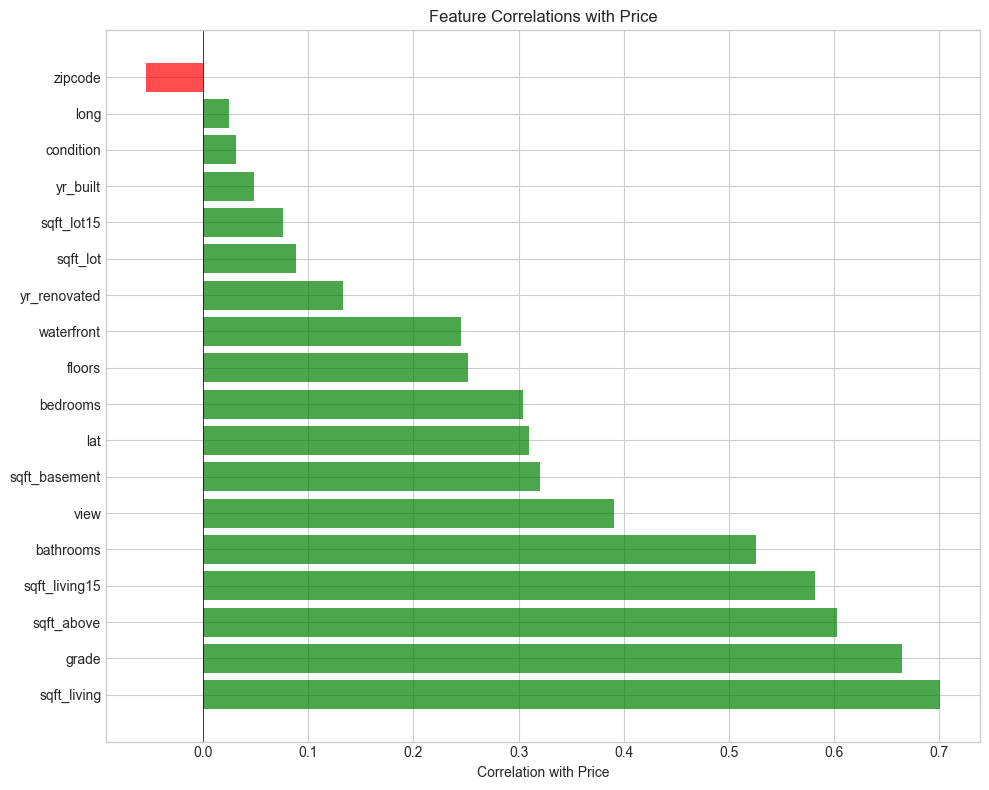

In [15]:
# Visualization
plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in correlations.values]
plt.barh(correlations.index, correlations.values, color=colors, alpha=0.7)
plt.xlabel('Correlation with Price')
plt.title('Feature Correlations with Price')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()

---
## Top Features vs Price

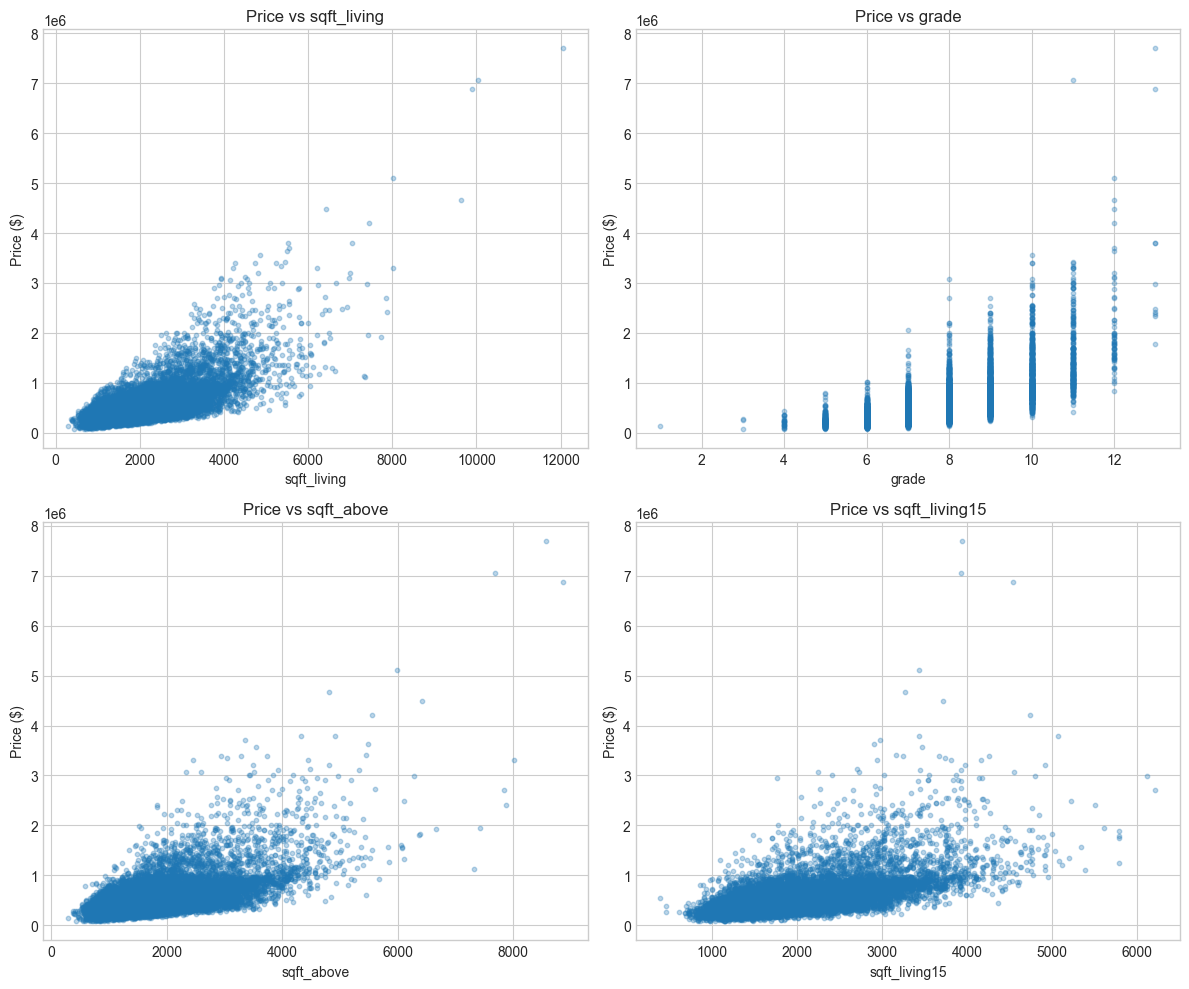

In [17]:
# Scatter plots of top correlated features
top_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(top_features):
    axes[i].scatter(df[col], df['price'], alpha=0.3, s=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Price ($)')
    axes[i].set_title(f'Price vs {col}')

plt.tight_layout()
plt.show()

---
## Categorical Features vs Price

In [18]:
# Grade distribution
print("Grade Value Counts:")
print(df['grade'].value_counts().sort_index())

Grade Value Counts:
grade
1        1
3        3
4       24
5      183
6     1511
7     6761
8     4563
9     1943
10     861
11     286
12      63
13      10
Name: count, dtype: int64


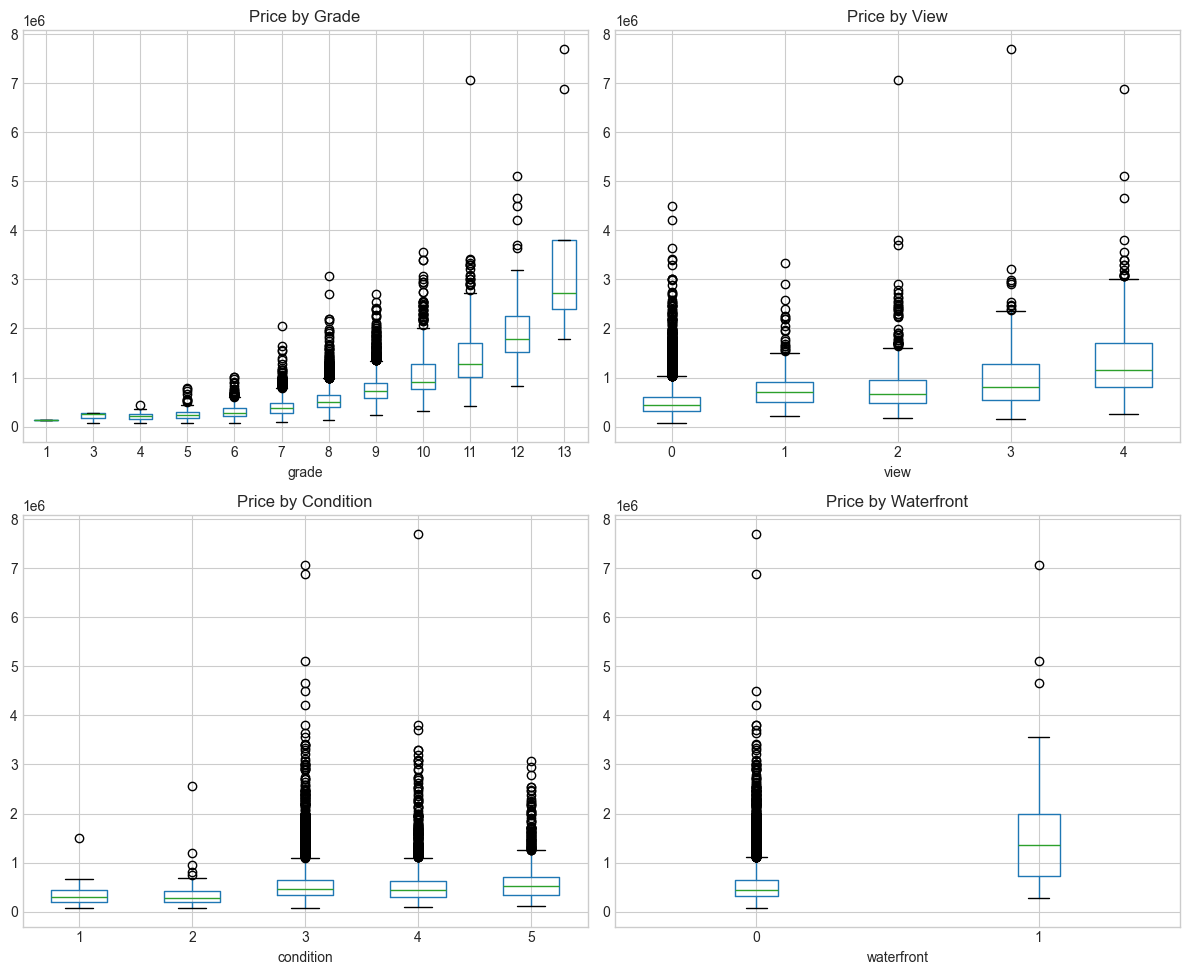

In [19]:
# Box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Grade vs Price
df.boxplot(column='price', by='grade', ax=axes[0,0])
axes[0,0].set_title('Price by Grade')

# View vs Price
df.boxplot(column='price', by='view', ax=axes[0,1])
axes[0,1].set_title('Price by View')

# Condition vs Price
df.boxplot(column='price', by='condition', ax=axes[1,0])
axes[1,0].set_title('Price by Condition')

# Waterfront vs Price
df.boxplot(column='price', by='waterfront', ax=axes[1,1])
axes[1,1].set_title('Price by Waterfront')

plt.suptitle('')
plt.tight_layout()
plt.show()

---
## Geographic Analysis 

In [20]:
# Geographic bounds
print("GEOGRAPHIC BOUNDARIES")
print(f"Latitude:  {df['lat'].min():.6f} to {df['lat'].max():.6f}")
print(f"Longitude: {df['long'].min():.6f} to {df['long'].max():.6f}")
print(f"\nUnique locations: {df[['lat', 'long']].drop_duplicates().shape[0]:,}")

GEOGRAPHIC BOUNDARIES
Latitude:  47.159300 to 47.777600
Longitude: -122.519000 to -121.315000

Unique locations: 15,750


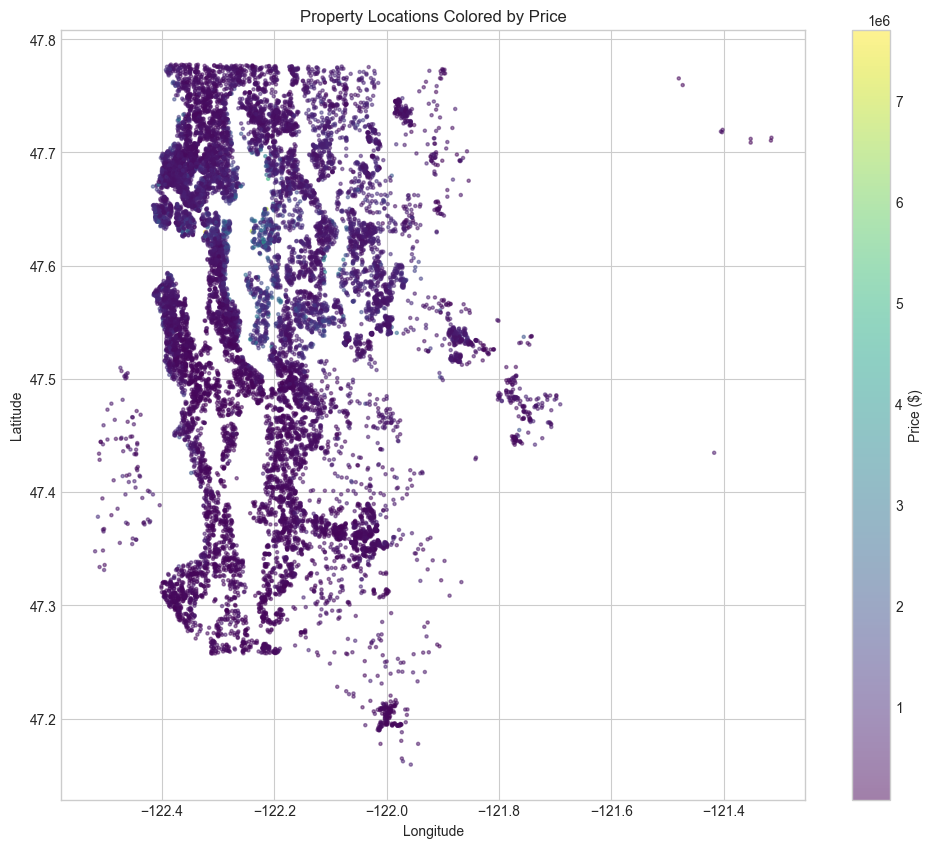

In [21]:
# Map of properties colored by price
plt.figure(figsize=(12, 10))
scatter = plt.scatter(df['long'], df['lat'], c=df['price'], 
                      cmap='viridis', alpha=0.5, s=5)
plt.colorbar(scatter, label='Price ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Property Locations Colored by Price')
plt.show()

---
## Correlation Heatmap

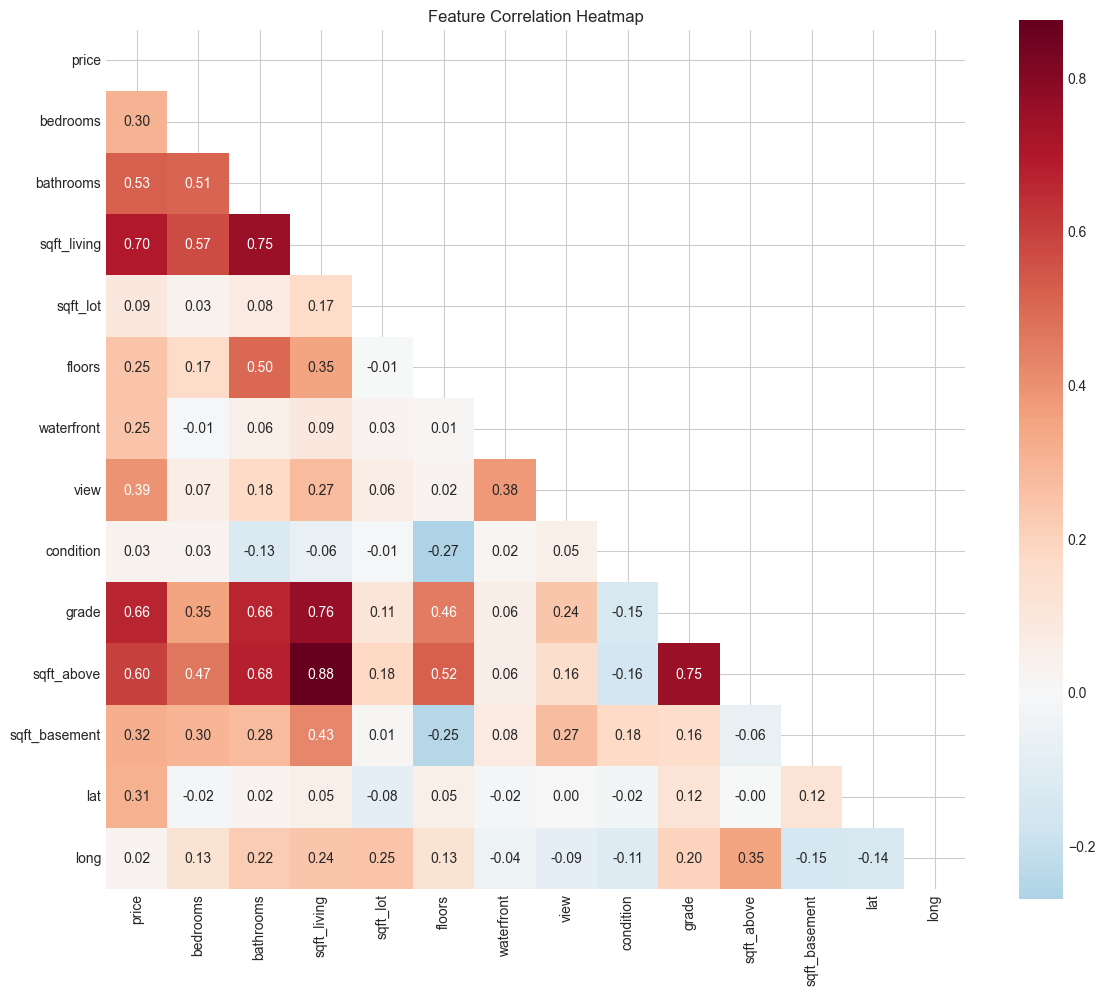

In [22]:
# Correlation heatmap
corr_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
             'floors', 'waterfront', 'view', 'condition', 'grade',
             'sqft_above', 'sqft_basement', 'lat', 'long']

plt.figure(figsize=(12, 10))
corr_matrix = df[corr_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

---
## Outlier Check

In [23]:
# Check for extreme values
print("EXTREME VALUES CHECK")
print(f"\nBedrooms > 10: {(df['bedrooms'] > 10).sum()}")
print(f"Bathrooms > 6: {(df['bathrooms'] > 6).sum()}")
print(f"Sqft > 10000: {(df['sqft_living'] > 10000).sum()}")
print(f"Price > $5M: {(df['price'] > 5000000).sum()}")
print(f"Price < $100K: {(df['price'] < 100000).sum()}")

EXTREME VALUES CHECK

Bedrooms > 10: 1
Bathrooms > 6: 5
Sqft > 10000: 2
Price > $5M: 4
Price < $100K: 19


In [24]:
# Bedroom outliers
print("Bedroom distribution (top end):")
print(df['bedrooms'].value_counts().sort_index().tail(10))

Bedroom distribution (top end):
bedrooms
2     2098
3     7380
4     5128
5     1213
6      197
7       26
8        9
9        5
10       2
33       1
Name: count, dtype: int64


## Feature Importance

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

columns_to_drop = ['id', 'date','price', 'zipcode']

X = df.drop(columns=columns_to_drop)
y = df['price']

y_log = np.log10(y)

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y_log,
    test_size=0.2,
    random_state=42
)

print("Train size:", X_train.shape)
print("Val size:", X_val.shape)

Train size: (12967, 17)
Val size: (3242, 17)


In [27]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [28]:
y_pred = np.expm1(xgb_model.predict(X_val))
y_true = np.expm1(y_val)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"Baseline XGBoost RMSE: {rmse:,.0f}")
print(f"Baseline XGBoost R²  : {r2:.4f}")

Baseline XGBoost RMSE: 22
Baseline XGBoost R²  : 0.9046


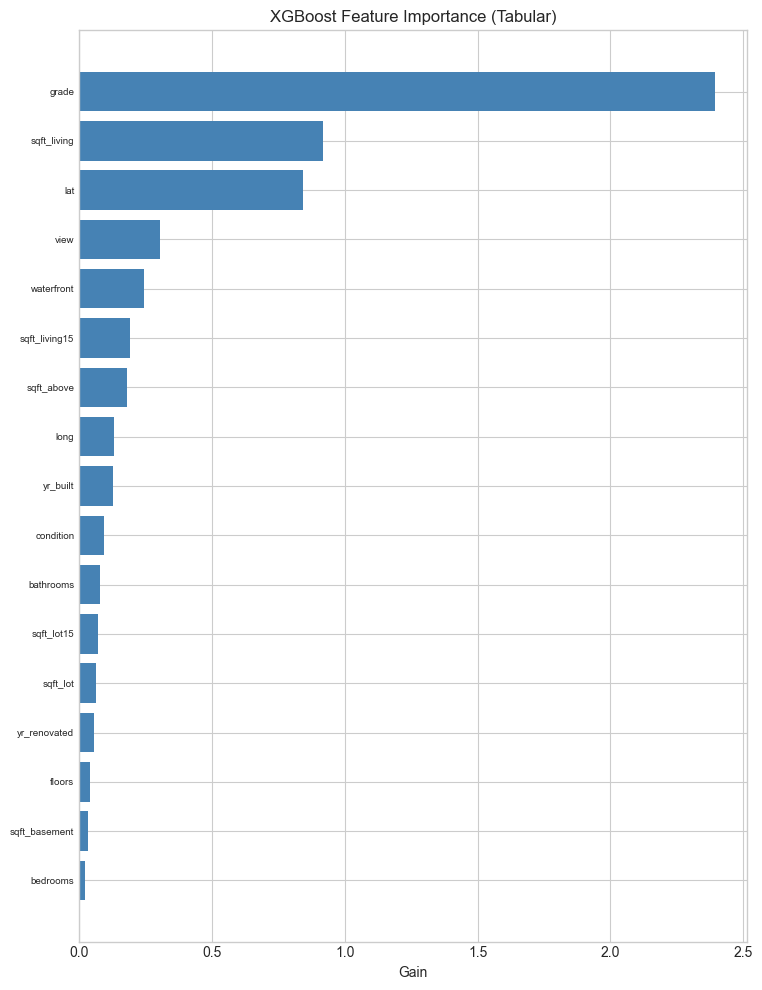

,feature,gain
8,grade,2.393785
2,sqft_living,0.916099
13,lat,0.841707
6,view,0.302942
5,waterfront,0.245484
15,sqft_living15,0.189380
9,sqft_above,0.179112
14,long,0.132464
11,yr_built,0.125626
7,condition,0.093638


In [29]:
importances = xgb_model.get_booster().get_score(importance_type="gain")

imp_df = (
    pd.DataFrame(importances.items(), columns=["feature", "gain"])
    .sort_values("gain", ascending=True)
)

plt.figure(figsize=(8, 10))
plt.barh(imp_df["feature"], imp_df["gain"], color="steelblue")
plt.title("XGBoost Feature Importance (Tabular)")
plt.xlabel("Gain")
plt.tight_layout()
plt.yticks(fontsize=7)
plt.show()

imp_df.sort_values("gain", ascending=False)